In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:/Users/FERNANDO LOPEZ/Documents/base_datos_2008.csv", nrows = 100000) #Número de filas de archivo a leer.
newdf = df[["AirTime","DepDelay"]].dropna()  #Se eliminan casos faltando de estas dos columnas

In [19]:
newdf = df[["AirTime", "Distance","TaxiOut","ArrDelay","DepDelay"]].dropna()  #Elimina las filas que contienen valores NULL

In [3]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(newdf) #Se muestra como se entrena un modelo de K-means (fit se ajusta el modelo)
kmeans.labels_

array([3, 3, 1, ..., 0, 3, 3])

In [4]:
np.unique(kmeans.labels_, return_counts=True) #Para mirar como quedan distribuidos los individuos en c/u de los grupos

(array([0, 1, 2, 3]), array([ 3944, 60402,  8274, 26078], dtype=int64))

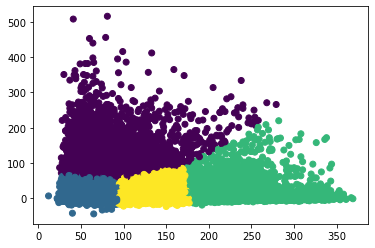

In [5]:
plt.scatter(newdf["AirTime"],newdf["DepDelay"],c = kmeans.labels_) #Para visualizar graficamente como quedan distribuidos los centroides
plt.show()

In [6]:
kmeans.cluster_centers_ #Se muestra donde quedan situados los centroides

array([[ 79.50946731, 116.4478667 ],
       [ 58.86814825,   5.65975557],
       [224.74990908,  10.03576191],
       [128.07685235,   5.12600567]])

In [7]:
alldf = pd.read_csv("C:/Users/FERNANDO LOPEZ/Documents/base_datos_2008.csv", nrows = 1000000)[["AirTime", "DepDelay"]].dropna()

In [8]:
kmeans.predict(alldf)[0:50] #Podemos usar el modelo para predecir (vemos muy pocos 0 y pocos 3)

array([3, 3, 1, 1, 1, 1, 2, 2, 1, 1, 3, 0, 1, 1, 1, 1, 2, 2, 3, 1, 1, 1,
       1, 1, 1, 1, 0, 3, 3, 2, 0, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 0])